In [10]:
from torchvision import datasets, transforms

dataset = datasets.VOCDetection(root="data", year="2007", image_set="val", download=True, transform=transforms.ToTensor())

100.0%


In [ ]:
import cv2
import numpy as np
from torch import Tensor

def selective_search(img, maxBboxes):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
    ss.setBaseImage(img)
    ss.switchToSelectiveSearchFast()

    bboxes = ss.process()
    filteredBboxes = [bbox for bbox in bboxes if bbox[2] >= 10 and bbox[3] >= 10]

    return filteredBboxes[:maxBboxes]

def tensor_to_cv_img(tensor: Tensor):
    tensor = tensor.squeeze(0) # remove batch dim
    # [3, H, W] -> [H, W, 3]
    img = tensor.permute(1, 2, 0).numpy()
    
    if img.max() <= 1.0:
        img = (img * 255).astype(np.uint8)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


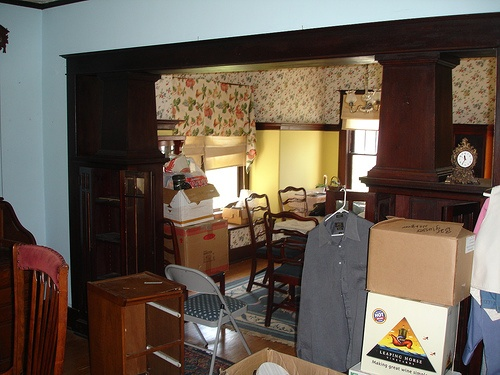

In [ ]:
transforms.ToPILImage()(dataset[0][0])

In [66]:
import json
target = dataset[0][1]
print(json.dumps(target["annotation"]["object"], indent=4))

[
    {
        "name": "chair",
        "pose": "Rear",
        "truncated": "0",
        "difficult": "0",
        "bndbox": {
            "xmin": "263",
            "ymin": "211",
            "xmax": "324",
            "ymax": "339"
        }
    },
    {
        "name": "chair",
        "pose": "Unspecified",
        "truncated": "0",
        "difficult": "0",
        "bndbox": {
            "xmin": "165",
            "ymin": "264",
            "xmax": "253",
            "ymax": "372"
        }
    },
    {
        "name": "chair",
        "pose": "Unspecified",
        "truncated": "1",
        "difficult": "1",
        "bndbox": {
            "xmin": "5",
            "ymin": "244",
            "xmax": "67",
            "ymax": "374"
        }
    },
    {
        "name": "chair",
        "pose": "Unspecified",
        "truncated": "0",
        "difficult": "0",
        "bndbox": {
            "xmin": "241",
            "ymin": "194",
            "xmax": "295",
            "ymax":

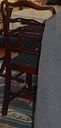

In [75]:
img = tensor_to_cv_img(dataset[0][0])
img = img[211:339, 263:324]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transforms.ToPILImage()(img)

In [1]:
import torch 

torch.tensor(-1).eq(torch.tensor(-1))

tensor(True)